# Shorting the VIX - a viable trading strategy?

Take a look at the vix index in it's lifetime below:

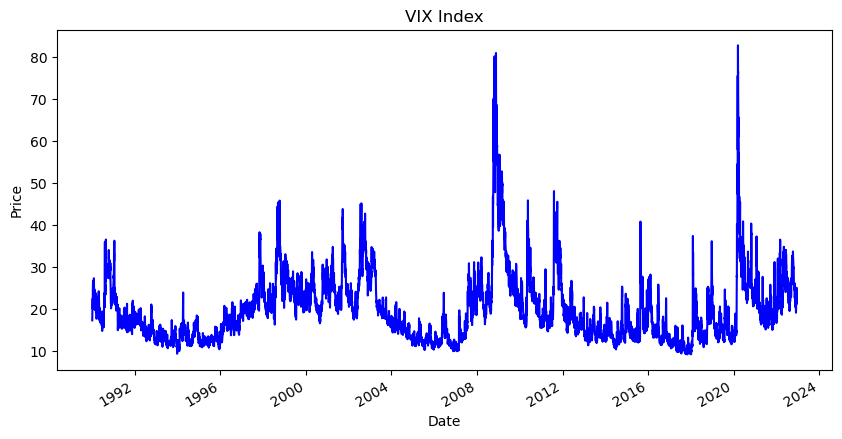

In [85]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

vix = yf.Ticker("^VIX").history(period="max")
vix["Close"].plot(color="Blue", figsize=(10,5))
plt.title("VIX Index")
plt.ylabel("Price")
plt.show()

<h3>The Strategy</h3>

I recently look at this graph and wondered; "Why not just short the VIX everytime it is above 30 and then buy back when it is below 20. Although the volatility is obviously clustered, the VIX seems rather stationary and one could be reasonably comfortable with it coming back down after a peak. Of course, I wan't to test how this strategy would work. 

In [37]:
# Initialize variables for wealth and position

wealth = []
position = []

# Seting threshold values

sell_threshold = 30
buy_threshold = 20

# Set initial values for wealth and position

wealth.append(100)
position.append(0)

# Iterate through the VIX data

for i in range(1, len(vix)):
    # Update the position based on the strategy
    if vix.iloc[i]["Close"] > sell_threshold and position[i-1] == 0 and wealth[i-1] >= vix.iloc[i]["Close"]:
        position.append(-1)
    elif vix.iloc[i]["Close"] < buy_threshold and position[i-1] == -1:
        position.append(0)
    else:
        position.append(position[i-1])
    
    # Update the wealth based on the position and price
    if position[i] == 0 and position[i-1] == -1:
        # Increase the wealth by the difference between the sell and buy thresholds
        wealth.append(wealth[i-1] + (sell_threshold - buy_threshold))
    else:
        # Do not increase the wealth if the position has not changed
        wealth.append(wealth[i-1])

Text(0, 0.5, 'Wealth index=100')

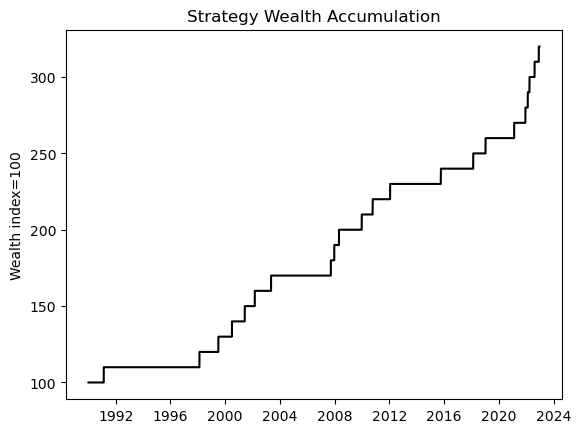

In [35]:
# Plotting wealth accumulation 

plt.plot(vix.index, wealth, color="Black")
plt.title("Strategy Wealth Accumulation")
plt.ylabel("Wealth index=100")

<h3>Short remarks</h3>

Note that this wealth development is actually not even with compound interest as we only buy/sell one VIX in our model! Thus, I expect to see very crazy results from this. Hmm, maybe not so much anyways as there is also two other factors which must be taken into account: (1) there seems to be a lot of opportunity cost when looking at the graph above, we sometimes have year-long periods of stagnation in the balance. (2) There is likely so quite high rolling costs involved with holding a short-VIX position - especially if it is held over longer periods of time. A further analysis should Include these counteracting terms, that is allowing for compound interest of the balance while also subtracting rolling costs and perhaps compare to a relevant benchmark. Please let me know if you have anything to add here. 

<h3>Recent Performance</h3>

Although we noted a few things above for the strategy over time, I am interested in taking a more detailed look at how it has performed during the uncertainty of the last couple of years. I suspect that this strategy is doing very well under crisis, but I have no real evidence substantiating this other than what I can see on the graph above. 

Let us test how the strategy has been performing from start 2020 up until todays date. 

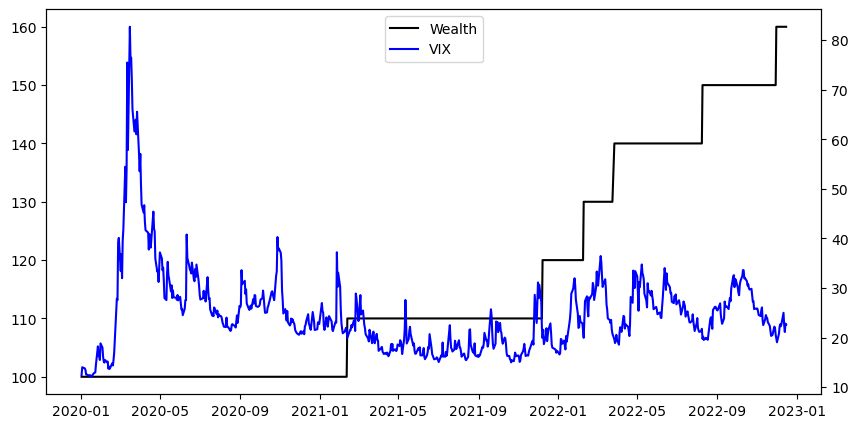

In [108]:
# We modify the data import accordinly

vix = yf.Ticker("^VIX").history(start="2020-01-01") 

# Plotting wealth accumulation (again)

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

l1,=ax1.plot(vix.index, wealth, color="Black")
l2,=ax2.plot(vix.index, vix["Close"], color="Blue")
plt.legend([l1, l2],["Wealth", "VIX"], loc='upper center')
plt.show()

The strategy seems to be peforming very well during the corona crisis and also for the subsequent period. Comparing this result to the one we saw historically this strategy seems like something that could definitely work well especially in periods with clustered volatility and thus highly shifting VIX-levels. Also, it does not seem like you have to "time" the positioning perfectly as there are still many possible entries even after the initial volatility spike. I find the first parts of this analysis very rewarding and interesting and given these exciting findings I plan on expanding this analysis!